In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv("hd_antisaccade (2).csv")

In [3]:
data = data.drop(data.columns[1], axis=1)

In [4]:
data = data.dropna(subset=['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'])

In [5]:
data = data.dropna(subset=['frsbescore_s - Frontal behaviours (FrSBe) self-rating total score'])

In [6]:
data1 = data.dropna(subset=['caglarger_value (CAG length)'])

In [26]:
data.to_csv("new1.csv")

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv('new1.csv')

# Remove any rows containing NaN values in relevant columns
data = data.dropna(subset=['frsbescore_s - Frontal behaviours (FrSBe) self-rating total score', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]'])

# Split the data into training and testing sets
X = data[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = data['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Gaussian Naive Bayes model to the training data
model = GaussianNB()
model.fit(X_train, y_train)

# Use the trained model to predict the values of incl02 for the test data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6960914496853531


In [8]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data from the CSV file
df = data1

# Select the features and the target variable
X = df[['age', 'caglarger_value (CAG length)']]
y = df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.8104047246829946


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the data into a pandas dataframe
df = pd.read_csv('new1.csv')

# Select the relevant features and target variable
X = data[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = data['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.6609575860210916


In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the data into a pandas dataframe
df = pd.read_csv('new1.csv')

# Select the relevant features and target variable
X = df[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the LDA classifier
lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('LDA Accuracy:', accuracy)


LDA Accuracy: 0.6685397582942036


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load the data from the CSV file
data = pd.read_csv('new1.csv')

# Select the features and the target variable
X = data[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = data['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM model on the training set
svm = SVC(kernel='linear', C=1)
svm.fit(X_train_scaled, y_train)

# Evaluate the model on the testing set
accuracy = svm.score(X_test_scaled, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8229894347901391


In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data from the CSV file
data = pd.read_csv('new1.csv')

# Extract the features and target variable
X  = data[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = data['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

# Train a Random Forest model on the training set
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9966515279809098


In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the data into a pandas dataframe
df = pd.read_csv('new1.csv')

# Select the relevant features and target variable
X = df[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the Gradient Boosting Machine classifier
gbm = GradientBoostingClassifier()

# Fit the model to the training data
gbm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbm.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('GBM Accuracy:', accuracy)


GBM Accuracy: 0.9453082903548611


In [27]:
from catboost import CatBoostClassifier

# Load the data into a pandas dataframe
df = pd.read_csv('new1.csv')

# Select the relevant features and target variable
X = df[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the CatBoost classifier
catboost = CatBoostClassifier()

# Fit the model to the training data
catboost.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('CatBoost Accuracy:', accuracy)


Learning rate set to 0.097552
0:	learn: 0.9745427	total: 18.4ms	remaining: 18.3s
1:	learn: 0.8801441	total: 35.5ms	remaining: 17.7s
2:	learn: 0.8040600	total: 54.9ms	remaining: 18.3s
3:	learn: 0.7409184	total: 71.1ms	remaining: 17.7s
4:	learn: 0.6896609	total: 87.6ms	remaining: 17.4s
5:	learn: 0.6421567	total: 105ms	remaining: 17.3s
6:	learn: 0.6036707	total: 123ms	remaining: 17.4s
7:	learn: 0.5718207	total: 141ms	remaining: 17.5s
8:	learn: 0.5410506	total: 157ms	remaining: 17.3s
9:	learn: 0.5134376	total: 174ms	remaining: 17.2s
10:	learn: 0.4890088	total: 196ms	remaining: 17.6s
11:	learn: 0.4677965	total: 217ms	remaining: 17.9s
12:	learn: 0.4489249	total: 242ms	remaining: 18.4s
13:	learn: 0.4320942	total: 264ms	remaining: 18.6s
14:	learn: 0.4179847	total: 282ms	remaining: 18.5s
15:	learn: 0.4038727	total: 301ms	remaining: 18.5s
16:	learn: 0.3928285	total: 327ms	remaining: 18.9s
17:	learn: 0.3787342	total: 350ms	remaining: 19.1s
18:	learn: 0.3658426	total: 375ms	remaining: 19.4s
19:	le

166:	learn: 0.0809831	total: 3.97s	remaining: 19.8s
167:	learn: 0.0804748	total: 4s	remaining: 19.8s
168:	learn: 0.0800042	total: 4.03s	remaining: 19.8s
169:	learn: 0.0796109	total: 4.05s	remaining: 19.8s
170:	learn: 0.0789890	total: 4.08s	remaining: 19.8s
171:	learn: 0.0784338	total: 4.11s	remaining: 19.8s
172:	learn: 0.0779636	total: 4.13s	remaining: 19.8s
173:	learn: 0.0774750	total: 4.16s	remaining: 19.8s
174:	learn: 0.0768987	total: 4.18s	remaining: 19.7s
175:	learn: 0.0760536	total: 4.22s	remaining: 19.8s
176:	learn: 0.0755470	total: 4.24s	remaining: 19.7s
177:	learn: 0.0749135	total: 4.27s	remaining: 19.7s
178:	learn: 0.0742998	total: 4.29s	remaining: 19.7s
179:	learn: 0.0740889	total: 4.31s	remaining: 19.6s
180:	learn: 0.0736435	total: 4.33s	remaining: 19.6s
181:	learn: 0.0732390	total: 4.36s	remaining: 19.6s
182:	learn: 0.0728475	total: 4.38s	remaining: 19.6s
183:	learn: 0.0724935	total: 4.41s	remaining: 19.5s
184:	learn: 0.0721722	total: 4.43s	remaining: 19.5s
185:	learn: 0.0

328:	learn: 0.0304350	total: 7.22s	remaining: 14.7s
329:	learn: 0.0302843	total: 7.25s	remaining: 14.7s
330:	learn: 0.0301482	total: 7.27s	remaining: 14.7s
331:	learn: 0.0300065	total: 7.28s	remaining: 14.7s
332:	learn: 0.0297257	total: 7.3s	remaining: 14.6s
333:	learn: 0.0295725	total: 7.32s	remaining: 14.6s
334:	learn: 0.0294601	total: 7.34s	remaining: 14.6s
335:	learn: 0.0293231	total: 7.36s	remaining: 14.5s
336:	learn: 0.0291679	total: 7.38s	remaining: 14.5s
337:	learn: 0.0289960	total: 7.4s	remaining: 14.5s
338:	learn: 0.0288586	total: 7.42s	remaining: 14.5s
339:	learn: 0.0287009	total: 7.44s	remaining: 14.4s
340:	learn: 0.0285456	total: 7.46s	remaining: 14.4s
341:	learn: 0.0284179	total: 7.47s	remaining: 14.4s
342:	learn: 0.0282473	total: 7.49s	remaining: 14.4s
343:	learn: 0.0280679	total: 7.51s	remaining: 14.3s
344:	learn: 0.0278780	total: 7.53s	remaining: 14.3s
345:	learn: 0.0277096	total: 7.55s	remaining: 14.3s
346:	learn: 0.0276008	total: 7.56s	remaining: 14.2s
347:	learn: 0.

488:	learn: 0.0146368	total: 10.9s	remaining: 11.4s
489:	learn: 0.0146191	total: 11s	remaining: 11.4s
490:	learn: 0.0146045	total: 11s	remaining: 11.4s
491:	learn: 0.0145900	total: 11.1s	remaining: 11.4s
492:	learn: 0.0145675	total: 11.1s	remaining: 11.4s
493:	learn: 0.0145294	total: 11.1s	remaining: 11.4s
494:	learn: 0.0145208	total: 11.1s	remaining: 11.4s
495:	learn: 0.0144814	total: 11.3s	remaining: 11.4s
496:	learn: 0.0143839	total: 11.3s	remaining: 11.4s
497:	learn: 0.0142926	total: 11.3s	remaining: 11.4s
498:	learn: 0.0142443	total: 11.4s	remaining: 11.4s
499:	learn: 0.0141319	total: 11.4s	remaining: 11.4s
500:	learn: 0.0140614	total: 11.4s	remaining: 11.4s
501:	learn: 0.0140575	total: 11.4s	remaining: 11.3s
502:	learn: 0.0139757	total: 11.5s	remaining: 11.3s
503:	learn: 0.0139114	total: 11.5s	remaining: 11.3s
504:	learn: 0.0138528	total: 11.5s	remaining: 11.3s
505:	learn: 0.0137885	total: 11.5s	remaining: 11.2s
506:	learn: 0.0137251	total: 11.5s	remaining: 11.2s
507:	learn: 0.01

652:	learn: 0.0092473	total: 15.9s	remaining: 8.46s
653:	learn: 0.0092405	total: 15.9s	remaining: 8.43s
654:	learn: 0.0092059	total: 16s	remaining: 8.4s
655:	learn: 0.0091698	total: 16s	remaining: 8.38s
656:	learn: 0.0091356	total: 16s	remaining: 8.36s
657:	learn: 0.0091270	total: 16s	remaining: 8.33s
658:	learn: 0.0090972	total: 16.1s	remaining: 8.31s
659:	learn: 0.0090498	total: 16.1s	remaining: 8.29s
660:	learn: 0.0090123	total: 16.1s	remaining: 8.27s
661:	learn: 0.0089885	total: 16.1s	remaining: 8.24s
662:	learn: 0.0089811	total: 16.2s	remaining: 8.22s
663:	learn: 0.0089661	total: 16.2s	remaining: 8.2s
664:	learn: 0.0089640	total: 16.2s	remaining: 8.18s
665:	learn: 0.0089579	total: 16.3s	remaining: 8.15s
666:	learn: 0.0089509	total: 16.3s	remaining: 8.13s
667:	learn: 0.0089358	total: 16.3s	remaining: 8.11s
668:	learn: 0.0089290	total: 16.3s	remaining: 8.08s
669:	learn: 0.0089226	total: 16.3s	remaining: 8.05s
670:	learn: 0.0088807	total: 16.4s	remaining: 8.02s
671:	learn: 0.0088785	

817:	learn: 0.0068962	total: 20.1s	remaining: 4.47s
818:	learn: 0.0068923	total: 20.1s	remaining: 4.44s
819:	learn: 0.0068843	total: 20.1s	remaining: 4.42s
820:	learn: 0.0068795	total: 20.2s	remaining: 4.4s
821:	learn: 0.0068769	total: 20.2s	remaining: 4.38s
822:	learn: 0.0068531	total: 20.2s	remaining: 4.35s
823:	learn: 0.0068315	total: 20.3s	remaining: 4.33s
824:	learn: 0.0068263	total: 20.3s	remaining: 4.3s
825:	learn: 0.0068166	total: 20.3s	remaining: 4.28s
826:	learn: 0.0067883	total: 20.3s	remaining: 4.26s
827:	learn: 0.0067860	total: 20.4s	remaining: 4.23s
828:	learn: 0.0067823	total: 20.4s	remaining: 4.21s
829:	learn: 0.0067793	total: 20.4s	remaining: 4.18s
830:	learn: 0.0067768	total: 20.5s	remaining: 4.16s
831:	learn: 0.0067740	total: 20.5s	remaining: 4.14s
832:	learn: 0.0067729	total: 20.5s	remaining: 4.12s
833:	learn: 0.0067671	total: 20.6s	remaining: 4.09s
834:	learn: 0.0067656	total: 20.6s	remaining: 4.07s
835:	learn: 0.0067608	total: 20.7s	remaining: 4.05s
836:	learn: 0.

980:	learn: 0.0055177	total: 24.5s	remaining: 475ms
981:	learn: 0.0055153	total: 24.5s	remaining: 450ms
982:	learn: 0.0055134	total: 24.6s	remaining: 425ms
983:	learn: 0.0055066	total: 24.6s	remaining: 400ms
984:	learn: 0.0055047	total: 24.6s	remaining: 375ms
985:	learn: 0.0054862	total: 24.6s	remaining: 350ms
986:	learn: 0.0054819	total: 24.6s	remaining: 325ms
987:	learn: 0.0054785	total: 24.7s	remaining: 300ms
988:	learn: 0.0054765	total: 24.7s	remaining: 275ms
989:	learn: 0.0054740	total: 24.7s	remaining: 250ms
990:	learn: 0.0054716	total: 24.8s	remaining: 225ms
991:	learn: 0.0054673	total: 24.8s	remaining: 200ms
992:	learn: 0.0054632	total: 24.9s	remaining: 175ms
993:	learn: 0.0054619	total: 24.9s	remaining: 150ms
994:	learn: 0.0054586	total: 25s	remaining: 125ms
995:	learn: 0.0054443	total: 25s	remaining: 100ms
996:	learn: 0.0054423	total: 25s	remaining: 75.3ms
997:	learn: 0.0054391	total: 25.1s	remaining: 50.2ms
998:	learn: 0.0054329	total: 25.1s	remaining: 25.1ms
999:	learn: 0.0

In [34]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, roc_auc_score
import pandas as pd

# Load the data into a pandas dataframe
df = pd.read_csv('new1.csv')

# Select the relevant features and target variable
X = df[['Amplitude [deg]','Correct','Duration [ms]','Foreperiod [ms]','Peak velocity [deg/s]','Self-corrected', 'functionalscore - Total functional capacity (TFC)', 'irrscore - (HAD-SIS) Irritability scale', 'motorscore - Total motor score (TMS)', 'rt', 'age', 'Latency [ms]']]
y = df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the CatBoost classifier
catboost = CatBoostClassifier()

# Fit the model to the training data
catboost.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost.predict(X_test)

# Calculate the precision score
precision = precision_score(y_test, y_pred, average='macro')

# Calculate the AUC-ROC score
y_pred_proba = catboost.predict_proba(X_test)
auc_roc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Print the results
print('Precision:', precision)
print('AUC-ROC:', auc_roc)


Learning rate set to 0.097552
0:	learn: 0.9745427	total: 27.1ms	remaining: 27.1s
1:	learn: 0.8801441	total: 42.9ms	remaining: 21.4s
2:	learn: 0.8040600	total: 59.3ms	remaining: 19.7s
3:	learn: 0.7409184	total: 80.1ms	remaining: 19.9s
4:	learn: 0.6896609	total: 94.8ms	remaining: 18.9s
5:	learn: 0.6421567	total: 110ms	remaining: 18.3s
6:	learn: 0.6036707	total: 125ms	remaining: 17.8s
7:	learn: 0.5718207	total: 159ms	remaining: 19.8s
8:	learn: 0.5410506	total: 181ms	remaining: 20s
9:	learn: 0.5134376	total: 207ms	remaining: 20.4s
10:	learn: 0.4890088	total: 232ms	remaining: 20.8s
11:	learn: 0.4677965	total: 255ms	remaining: 21s
12:	learn: 0.4489249	total: 281ms	remaining: 21.3s
13:	learn: 0.4320942	total: 302ms	remaining: 21.3s
14:	learn: 0.4179847	total: 323ms	remaining: 21.2s
15:	learn: 0.4038727	total: 349ms	remaining: 21.5s
16:	learn: 0.3928285	total: 369ms	remaining: 21.4s
17:	learn: 0.3787342	total: 390ms	remaining: 21.3s
18:	learn: 0.3658426	total: 415ms	remaining: 21.4s
19:	learn:

170:	learn: 0.0789890	total: 4.13s	remaining: 20s
171:	learn: 0.0784338	total: 4.15s	remaining: 20s
172:	learn: 0.0779636	total: 4.17s	remaining: 20s
173:	learn: 0.0774750	total: 4.2s	remaining: 19.9s
174:	learn: 0.0768987	total: 4.21s	remaining: 19.9s
175:	learn: 0.0760536	total: 4.23s	remaining: 19.8s
176:	learn: 0.0755470	total: 4.25s	remaining: 19.8s
177:	learn: 0.0749135	total: 4.27s	remaining: 19.7s
178:	learn: 0.0742998	total: 4.28s	remaining: 19.6s
179:	learn: 0.0740889	total: 4.3s	remaining: 19.6s
180:	learn: 0.0736435	total: 4.31s	remaining: 19.5s
181:	learn: 0.0732390	total: 4.33s	remaining: 19.5s
182:	learn: 0.0728475	total: 4.35s	remaining: 19.4s
183:	learn: 0.0724935	total: 4.37s	remaining: 19.4s
184:	learn: 0.0721722	total: 4.38s	remaining: 19.3s
185:	learn: 0.0717826	total: 4.41s	remaining: 19.3s
186:	learn: 0.0714306	total: 4.43s	remaining: 19.2s
187:	learn: 0.0710121	total: 4.44s	remaining: 19.2s
188:	learn: 0.0701083	total: 4.46s	remaining: 19.1s
189:	learn: 0.069173

337:	learn: 0.0289960	total: 7.37s	remaining: 14.4s
338:	learn: 0.0288586	total: 7.39s	remaining: 14.4s
339:	learn: 0.0287009	total: 7.41s	remaining: 14.4s
340:	learn: 0.0285456	total: 7.43s	remaining: 14.4s
341:	learn: 0.0284179	total: 7.44s	remaining: 14.3s
342:	learn: 0.0282473	total: 7.46s	remaining: 14.3s
343:	learn: 0.0280679	total: 7.48s	remaining: 14.3s
344:	learn: 0.0278780	total: 7.5s	remaining: 14.2s
345:	learn: 0.0277096	total: 7.51s	remaining: 14.2s
346:	learn: 0.0276008	total: 7.53s	remaining: 14.2s
347:	learn: 0.0274715	total: 7.54s	remaining: 14.1s
348:	learn: 0.0273547	total: 7.57s	remaining: 14.1s
349:	learn: 0.0271440	total: 7.59s	remaining: 14.1s
350:	learn: 0.0270504	total: 7.62s	remaining: 14.1s
351:	learn: 0.0269393	total: 7.64s	remaining: 14.1s
352:	learn: 0.0268008	total: 7.66s	remaining: 14s
353:	learn: 0.0265335	total: 7.67s	remaining: 14s
354:	learn: 0.0264560	total: 7.69s	remaining: 14s
355:	learn: 0.0263863	total: 7.71s	remaining: 14s
356:	learn: 0.0261271

498:	learn: 0.0142443	total: 10.9s	remaining: 10.9s
499:	learn: 0.0141319	total: 10.9s	remaining: 10.9s
500:	learn: 0.0140614	total: 10.9s	remaining: 10.9s
501:	learn: 0.0140575	total: 10.9s	remaining: 10.9s
502:	learn: 0.0139757	total: 11s	remaining: 10.8s
503:	learn: 0.0139114	total: 11s	remaining: 10.8s
504:	learn: 0.0138528	total: 11s	remaining: 10.8s
505:	learn: 0.0137885	total: 11s	remaining: 10.8s
506:	learn: 0.0137251	total: 11.1s	remaining: 10.7s
507:	learn: 0.0136742	total: 11.1s	remaining: 10.7s
508:	learn: 0.0136184	total: 11.1s	remaining: 10.7s
509:	learn: 0.0135555	total: 11.1s	remaining: 10.7s
510:	learn: 0.0134121	total: 11.1s	remaining: 10.7s
511:	learn: 0.0133908	total: 11.2s	remaining: 10.6s
512:	learn: 0.0133853	total: 11.2s	remaining: 10.6s
513:	learn: 0.0133552	total: 11.2s	remaining: 10.6s
514:	learn: 0.0133205	total: 11.2s	remaining: 10.6s
515:	learn: 0.0132914	total: 11.2s	remaining: 10.5s
516:	learn: 0.0132546	total: 11.3s	remaining: 10.5s
517:	learn: 0.013221

660:	learn: 0.0090123	total: 14.2s	remaining: 7.28s
661:	learn: 0.0089885	total: 14.2s	remaining: 7.27s
662:	learn: 0.0089811	total: 14.3s	remaining: 7.24s
663:	learn: 0.0089661	total: 14.3s	remaining: 7.22s
664:	learn: 0.0089640	total: 14.3s	remaining: 7.2s
665:	learn: 0.0089579	total: 14.3s	remaining: 7.17s
666:	learn: 0.0089509	total: 14.3s	remaining: 7.16s
667:	learn: 0.0089358	total: 14.4s	remaining: 7.13s
668:	learn: 0.0089290	total: 14.4s	remaining: 7.11s
669:	learn: 0.0089226	total: 14.4s	remaining: 7.09s
670:	learn: 0.0088807	total: 14.4s	remaining: 7.07s
671:	learn: 0.0088785	total: 14.4s	remaining: 7.05s
672:	learn: 0.0088754	total: 14.5s	remaining: 7.03s
673:	learn: 0.0088632	total: 14.5s	remaining: 7s
674:	learn: 0.0088588	total: 14.5s	remaining: 6.98s
675:	learn: 0.0088279	total: 14.5s	remaining: 6.96s
676:	learn: 0.0088266	total: 14.5s	remaining: 6.94s
677:	learn: 0.0088128	total: 14.6s	remaining: 6.92s
678:	learn: 0.0088071	total: 14.6s	remaining: 6.9s
679:	learn: 0.008

828:	learn: 0.0067823	total: 17.7s	remaining: 3.64s
829:	learn: 0.0067793	total: 17.7s	remaining: 3.62s
830:	learn: 0.0067768	total: 17.7s	remaining: 3.6s
831:	learn: 0.0067740	total: 17.7s	remaining: 3.58s
832:	learn: 0.0067729	total: 17.7s	remaining: 3.55s
833:	learn: 0.0067671	total: 17.7s	remaining: 3.53s
834:	learn: 0.0067656	total: 17.8s	remaining: 3.51s
835:	learn: 0.0067608	total: 17.8s	remaining: 3.49s
836:	learn: 0.0067396	total: 17.8s	remaining: 3.47s
837:	learn: 0.0067376	total: 17.8s	remaining: 3.45s
838:	learn: 0.0067353	total: 17.8s	remaining: 3.42s
839:	learn: 0.0067330	total: 17.9s	remaining: 3.4s
840:	learn: 0.0067236	total: 17.9s	remaining: 3.38s
841:	learn: 0.0067185	total: 17.9s	remaining: 3.36s
842:	learn: 0.0066940	total: 17.9s	remaining: 3.34s
843:	learn: 0.0066753	total: 17.9s	remaining: 3.32s
844:	learn: 0.0066684	total: 18s	remaining: 3.29s
845:	learn: 0.0066484	total: 18s	remaining: 3.27s
846:	learn: 0.0066473	total: 18s	remaining: 3.25s
847:	learn: 0.006628

995:	learn: 0.0054443	total: 21s	remaining: 84.5ms
996:	learn: 0.0054423	total: 21.1s	remaining: 63.4ms
997:	learn: 0.0054391	total: 21.1s	remaining: 42.3ms
998:	learn: 0.0054329	total: 21.1s	remaining: 21.1ms
999:	learn: 0.0054180	total: 21.1s	remaining: 0us
Precision: 0.998897578708987
AUC-ROC: 0.999997674697045


In [9]:
import pandas as pd

# Load the csv file into a dataframe
df = pd.read_csv("new1.csv")

# Filter the dataframe based on incl02 score and get the mean age
mean_age_0 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 0, "age"].mean()
mean_age_1 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 1, "age"].mean()
mean_age_2 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 2, "age"].mean()

# Print the mean age for each incl02 score
print("Mean age for incl02=0: {:.2f}".format(mean_age_0))
print("Mean age for incl02=1: {:.2f}".format(mean_age_1))
print("Mean age for incl02=2: {:.2f}".format(mean_age_2))

Mean age for incl02=0: 46.00
Mean age for incl02=1: 40.76
Mean age for incl02=2: 49.04


In [17]:
import pandas as pd

# Load the csv file into a dataframe
df = pd.read_csv("new1.csv")

# Filter the dataframe based on incl02 score and get the mean age
mean_Latency_0 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 0, "Latency [ms]"].mean()
mean_Latency_1 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 1, "Latency [ms]"].mean()
mean_Latency_2 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 2, "Latency [ms]"].mean()

# Print the mean age for each incl02 score
print("Mean age for Latency [ms]: {:.2f}".format(mean_Latency_0))
print("Mean age for Latency [ms]: {:.2f}".format(mean_Latency_1))
print("Mean age for Latency [ms]: {:.2f}".format(mean_Latency_2))

Mean age for Latency [ms]: 324.37
Mean age for Latency [ms]: 330.10
Mean age for Latency [ms]: 366.14


In [15]:
import pandas as pd

# Load the csv file into a dataframe
df = pd.read_csv("new1.csv")

# Filter the dataframe based on incl02 score and get the mean age
mean_cag_0 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 0, "caglarger_value (CAG length)"].mean()
mean_cag_1 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 1, "caglarger_value (CAG length)"].mean()
mean_cag_2 = df.loc[df["incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)"] == 2, "caglarger_value (CAG length)"].mean()

# Print the mean age for each incl02 score
print("Mean age for cag: {:.2f}".format(mean_cag_0))
print("Mean age for cag: {:.2f}".format(mean_cag_1))
print("Mean age for cag: {:.2f}".format(mean_cag_2))

Mean age for cag: nan
Mean age for cag: 43.16
Mean age for cag: 43.57


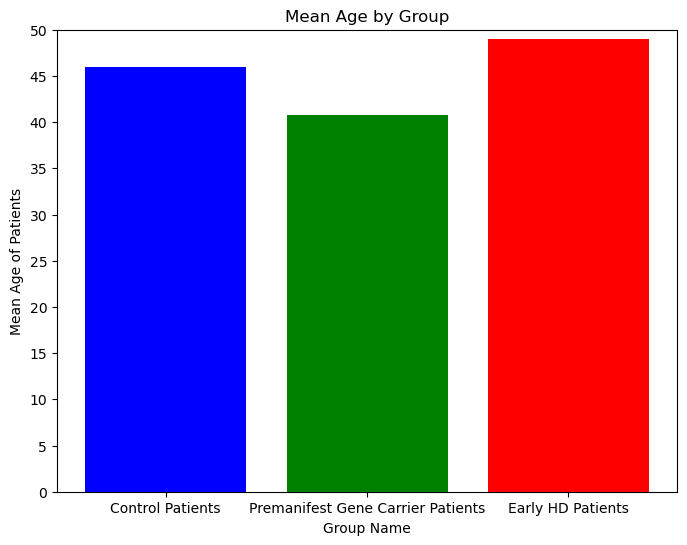

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('new1.csv')

# Filter the data by incl02 score
incl02_0 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 0]['age'].mean()
incl02_1 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 1]['age'].mean()
incl02_2 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 2]['age'].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Control Patients', 'Premanifest Gene Carrier Patients', 'Early HD Patients'], [incl02_0, incl02_1, incl02_2], color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Group Name')
plt.ylabel('Mean Age of Patients')
plt.title('Mean Age by Group')

# Set the y-axis limits
plt.ylim(0, 50)
plt.yticks(range(0, 51, 5))



# Display the plot
plt.show()


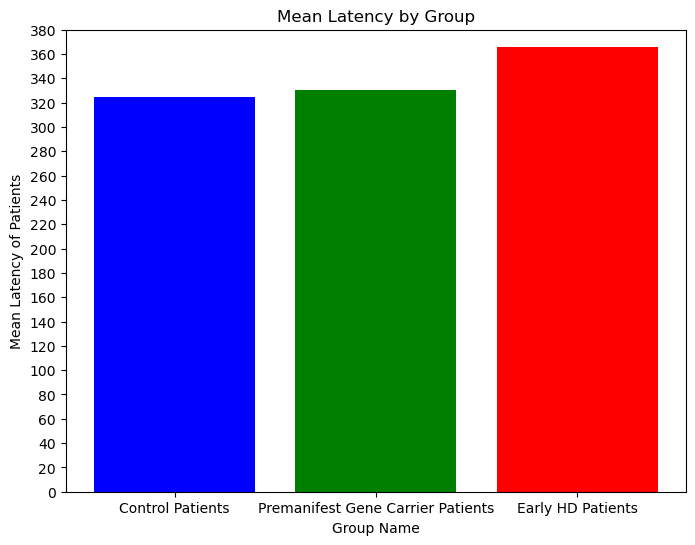

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('new1.csv')

# Filter the data by incl02 score
Latency_0 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 0]['Latency [ms]'].mean()
Latency_1 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 1]['Latency [ms]'].mean()
Latency_2 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 2]['Latency [ms]'].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(['Control Patients', 'Premanifest Gene Carrier Patients', 'Early HD Patients'], [Latency_0, Latency_1, Latency_2], color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Group Name')
plt.ylabel('Mean Latency of Patients')
plt.title('Mean Latency by Group')

# Set the y-axis limits
plt.ylim(0, 50)
plt.yticks(range(0, 400, 20))



# Display the plot
plt.show()


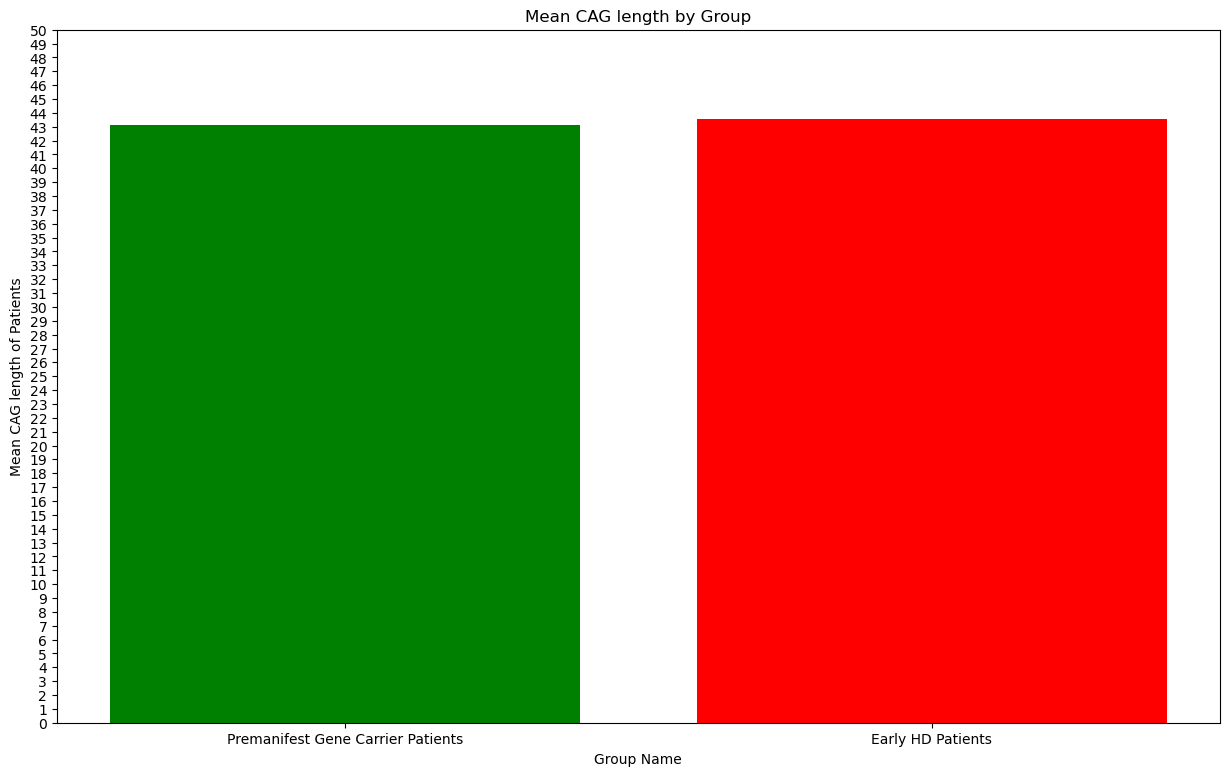

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('new1.csv')

# Filter the data by incl02 score
cag_0 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 0]['caglarger_value (CAG length)'].mean()
cag_1 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 1]['caglarger_value (CAG length)'].mean()
cag_2 = df[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 2]['caglarger_value (CAG length)'].mean()

# Create a bar plot
fig, ax = plt.subplots(figsize=(15,9))
ax.bar(['Control Patients', 'Premanifest Gene Carrier Patients', 'Early HD Patients'], [cag_0, cag_1, cag_2], color=['blue', 'green', 'red'])

# Add labels and title
plt.xlabel('Group Name')
plt.ylabel('Mean CAG length of Patients')
plt.title('Mean CAG length by Group')

# Set the y-axis limits
plt.ylim(0, 50)
plt.yticks(range(0, 51, 1))



# Display the plot
plt.show()


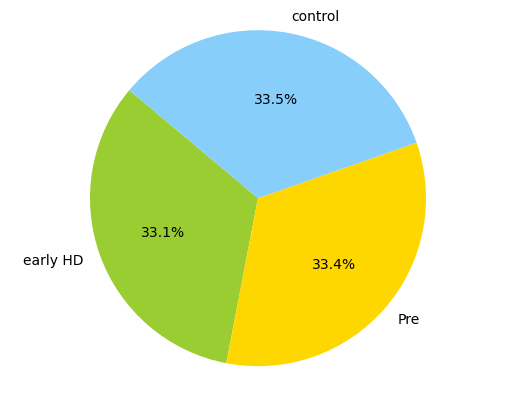

In [61]:
early_hd = df.loc[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 2]['subj_idx'].tolist()
premanifest_gene_carrier = df.loc[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 1]['subj_idx'].tolist()
control = df.loc[df['incl02 (0 = control subject, 1 = premanifest gene carrier, 2 = early HD)'] == 0]['subj_idx'].tolist()

labels = ['early HD', 'Pre', 'control']
sizes = [len(early_hd), len(premanifest_gene_carrier), len(control)]
colors = ['yellowgreen', 'gold', 'lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.show()